Credits (Udemy Course) - https://www.udemy.com/course/deeplearning/

## Churn Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from ann_visualizer.visualize import ann_viz
import graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [5]:
tf.__version__

'2.10.0'

#### Reading the dataset

In [2]:
df = pd.read_csv(r"E:\Github\Datasets\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Data Exploration

In [19]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

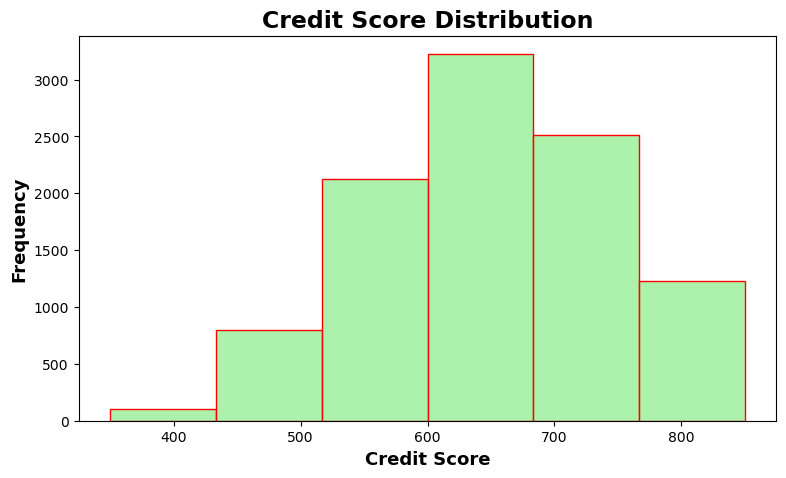

In [32]:
plt.figure(figsize=(9,5))

sns.histplot(x = 'CreditScore', data = df, bins = 6, color='lightgreen', edgecolor='red')

plt.title('Credit Score Distribution', fontsize=17, fontweight="bold")
plt.ylabel('Frequency', fontsize=13, fontweight="bold")
plt.xlabel('Credit Score', fontsize=13, fontweight="bold");

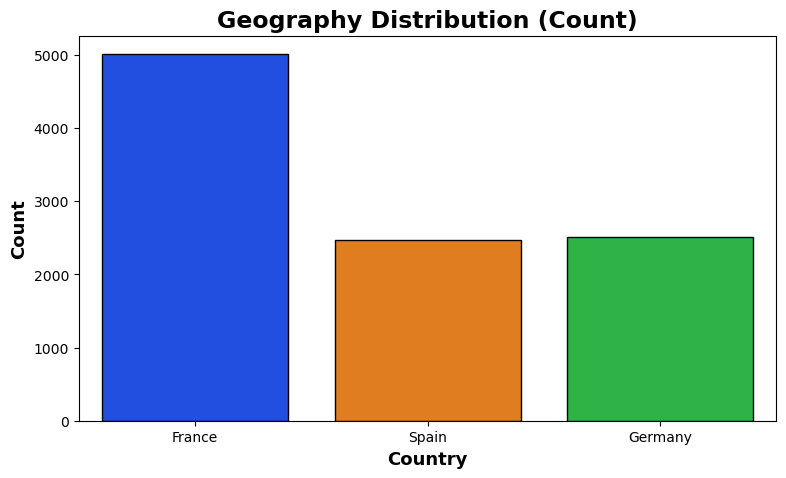

In [33]:
plt.figure(figsize=(9,5))

sns.countplot(data = df, x = 'Geography', palette = "bright", edgecolor='black')

plt.title('Geography Distribution (Count)', fontsize=17, fontweight="bold")
plt.ylabel('Count', fontsize=13, fontweight="bold")
plt.xlabel('Country', fontsize=13, fontweight="bold");

In [7]:
gender_distribution = df['Gender'].value_counts()
gender_distribution

Male      5457
Female    4543
Name: Gender, dtype: int64

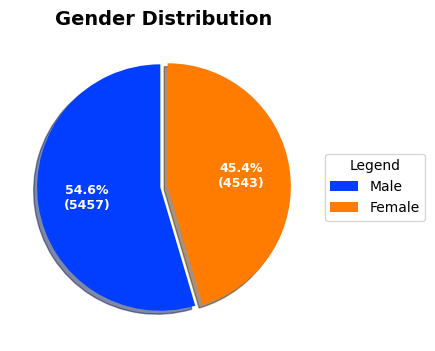

In [15]:
fig, ax = plt.subplots(figsize=[12,4])

labels = gender_distribution.index
data = gender_distribution.values
colors = sns.color_palette('bright')[0:3]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges, texts, autopcts = ax.pie(x= data, 
                                 autopct=lambda pct: func(pct, data), 
                                 explode=[0.03]*len(data), 
                                 shadow=True, 
                                 startangle = 90,
                                 colors = colors
                                 )
# Adding legend
ax.legend(wedges, labels,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':9})
plt.title("Gender Distribution", fontsize=14, fontweight="bold");


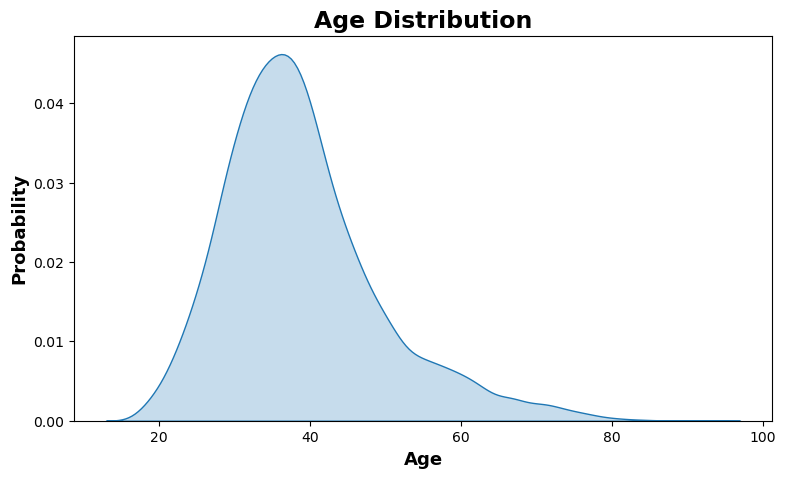

In [35]:
plt.figure(figsize=(9,5))

sns.kdeplot(x = 'Age', data = df, fill='lightblue')

plt.title('Age Distribution', fontsize=17, fontweight="bold")
plt.ylabel('Probability', fontsize=13, fontweight="bold")
plt.xlabel('Age', fontsize=13, fontweight="bold");

In [39]:
tenure_counts = df['Tenure'].value_counts().sort_index()
tenure_counts

0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: Tenure, dtype: int64

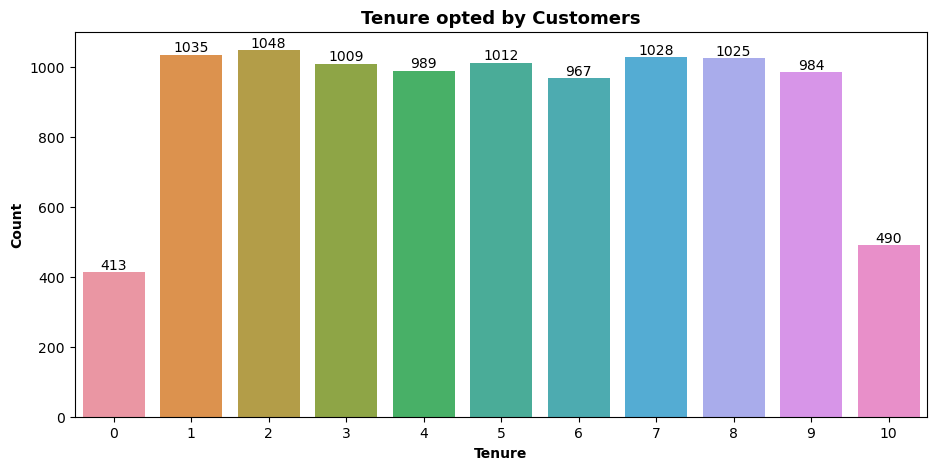

In [40]:
plt.figure(figsize=(11,5))

label = tenure_counts.index
data = tenure_counts.values

ax = sns.barplot(x = label, y = data)
ax.bar_label(ax.containers[0])

plt.title('Tenure opted by Customers', fontsize = 13, fontweight="bold")
plt.xlabel('Tenure', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

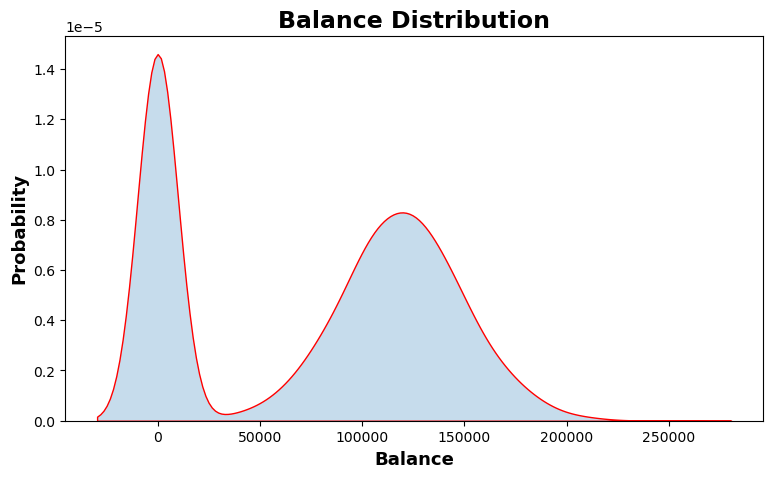

In [44]:
plt.figure(figsize=(9,5))

sns.kdeplot(x = 'Balance', data = df, fill='lightblue', edgecolor='red')

plt.title('Balance Distribution', fontsize=17, fontweight="bold")
plt.ylabel('Probability', fontsize=13, fontweight="bold")
plt.xlabel('Balance', fontsize=13, fontweight="bold");

In [46]:
NumOfProducts_counts = df['NumOfProducts'].value_counts()
NumOfProducts_counts

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

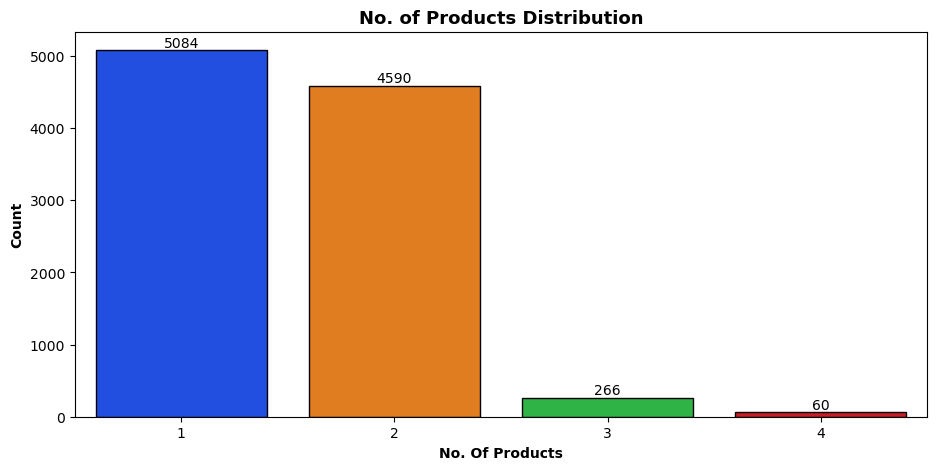

In [51]:
plt.figure(figsize=(11,5))

label = NumOfProducts_counts.index
data = NumOfProducts_counts.values

ax = sns.barplot(x = label, y = data, palette = "bright", edgecolor='black')
ax.bar_label(ax.containers[0])

plt.title('No. of Products Distribution', fontsize = 13, fontweight="bold")
plt.xlabel('No. Of Products', fontweight="bold")
plt.ylabel('Count', fontweight="bold");

In [57]:
creditcard_counts = df['HasCrCard'].value_counts()
creditcard_counts

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [58]:
active_member_count = df['IsActiveMember'].value_counts()
active_member_count

1    5151
0    4849
Name: IsActiveMember, dtype: int64

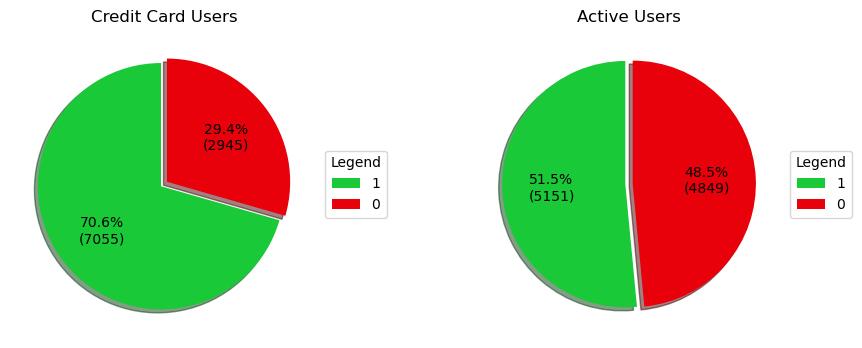

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=[11,4])

labels_credit = creditcard_counts.index
data_credit = creditcard_counts.values
labels_activemem = active_member_count.index
data_activemem = active_member_count.values

colors = sns.color_palette('bright')[2:4]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges_credit, texts_credit, autopcts_credit = ax1.pie(x= data_credit, 
                                                         autopct=lambda pct: func(pct, data_credit), 
                                                         explode=[0.03]*len(data_credit), 
                                                         shadow=True, 
                                                         startangle = 90,
                                                         colors = colors
                                                         )

wedges_activemem, texts_activemem, autopcts_activemem = ax2.pie(x= data_activemem, 
                                                                 autopct=lambda pct: func(pct, data_activemem), 
                                                                 explode=[0.03]*len(data_activemem), 
                                                                 shadow=True, 
                                                                 startangle = 90,
                                                                 colors = colors
                                                                 )

# Adding legend
ax1.legend(wedges_credit, labels_credit,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("H Distribution", fontsize=14, fontweight="bold")
ax2.legend(wedges_activemem, labels_activemem,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':9})

ax1.set_title("Credit Card Users", fontsize=12)
ax2.set_title("Active Users", fontsize=12)
plt.show()
#fig.suptitle('Distributions', fontsize=14, fontweight="bold");

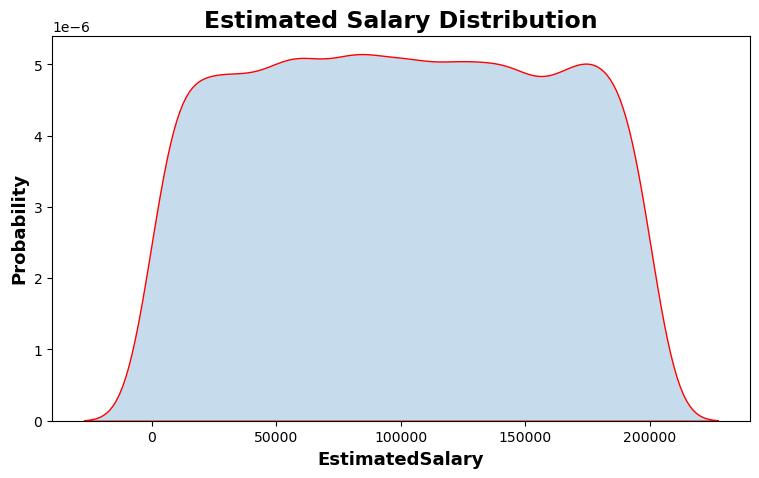

In [52]:
plt.figure(figsize=(9,5))

sns.kdeplot(x = 'EstimatedSalary', data = df, fill='lightblue', edgecolor='red')

plt.title('Estimated Salary Distribution', fontsize=17, fontweight="bold")
plt.ylabel('Probability', fontsize=13, fontweight="bold")
plt.xlabel('EstimatedSalary', fontsize=13, fontweight="bold");

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

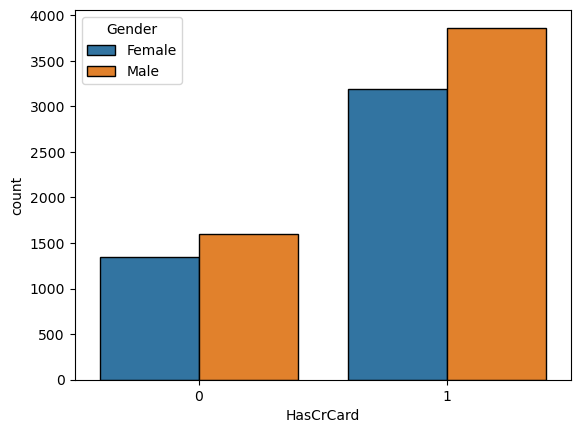

In [29]:
sns.countplot(data = df, x = 'HasCrCard', hue = 'Gender', edgecolor = 'black')

In [8]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [9]:
X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]

In [10]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Encoding categorical variables

In [12]:
le = LabelEncoder()

In [13]:
X['Gender'] = le.fit_transform(X['Gender'])

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [15]:
X = pd.get_dummies(data = X, 
               prefix='Geography',
               prefix_sep='_',
               dummy_na = False,
               columns=['Geography'])

In [16]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [17]:
X_cols = list(X.columns)
X_cols

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain']

In [18]:
X = X.values
y = y.values

Splitting of the dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train.shape, y_train.shape

((8000, 12), (8000,))

In [21]:
X_test.shape, y_test.shape

((2000, 12), (2000,))

Feature Scaling

In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train[:5]

array([[ 0.16958176, -1.09168714, -0.46460796,  0.00666099, -1.21571749,
         0.8095029 ,  0.64259497, -1.03227043,  1.10643166, -1.01460667,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, -1.37744033, -0.00631193,
        -0.92159124,  0.64259497,  0.9687384 , -0.74866447, -1.01460667,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, -1.031415  ,  0.57993469,
        -0.92159124,  0.64259497, -1.03227043,  1.48533467,  0.98560362,
        -0.5698444 , -0.57369368],
       [ 0.03556578,  0.91601335,  0.10961719,  0.00666099,  0.47312769,
        -0.92159124,  0.64259497, -1.03227043,  1.27652776, -1.01460667,
        -0.5698444 ,  1.74309049],
       [ 2.05611444, -1.09168714,  1.73658844,  1.04473698,  0.8101927 ,
         0.8095029 ,  0.64259497,  0.9687384 ,  0.55837842, -1.01460667,
        -0.5698444 ,  1.74309049]])

In [24]:
X_test[:5]

array([[-0.55204276, -1.09168714, -0.36890377,  1.04473698,  0.8793029 ,
        -0.92159124,  0.64259497,  0.9687384 ,  1.61085707, -1.01460667,
         1.75486502, -0.57369368],
       [-1.31490297, -1.09168714,  0.10961719, -1.031415  ,  0.42972196,
        -0.92159124,  0.64259497, -1.03227043,  0.49587037,  0.98560362,
        -0.5698444 , -0.57369368],
       [ 0.57162971, -1.09168714,  0.30102557,  1.04473698,  0.30858264,
        -0.92159124,  0.64259497,  0.9687384 , -0.42478674, -1.01460667,
        -0.5698444 ,  1.74309049],
       [ 1.41696129,  0.91601335, -0.65601634, -0.33936434,  0.57533623,
        -0.92159124, -1.55619021, -1.03227043, -0.18777657,  0.98560362,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.91601335, -0.08179119,  0.00666099,  1.38961097,
         0.8095029 ,  0.64259497,  0.9687384 ,  0.61684179, -1.01460667,
         1.75486502, -0.57369368]])

In [25]:
y_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [26]:
y_test[:5]

array([0, 1, 0, 0, 0], dtype=int64)

#### Building the ANN Model

In [27]:
ann = tf.keras.models.Sequential()

In [28]:
ann.add(tf.keras.layers.Dense(units= 6, activation = 'relu'))

In [29]:
ann.add(tf.keras.layers.Dense(units= 6, activation = 'relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

In [31]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
ann.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
250/250 [==============================] - 4s 5ms/step - loss: 0.6012 - accuracy: 0.7020
Epoch 2/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4801 - accuracy: 0.7960
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4463 - accuracy: 0.7960
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4317 - accuracy: 0.7971
Epoch 5/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4182 - accuracy: 0.8185
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4035 - accuracy: 0.8321
Epoch 7/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3904 - accuracy: 0.8411
Epoch 8/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3792 - accuracy: 0.8493
Epoch 9/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3712 - accuracy: 0.8495
Epoch 10/200
250/250 [==============================] - 2s 8ms/step - loss: 0.3659 - accura

Epoch 81/200
250/250 [==============================] - 2s 6ms/step - loss: 0.3339 - accuracy: 0.8661
Epoch 82/200
250/250 [==============================] - 1s 6ms/step - loss: 0.3339 - accuracy: 0.8640
Epoch 83/200
250/250 [==============================] - 2s 6ms/step - loss: 0.3339 - accuracy: 0.8641
Epoch 84/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3337 - accuracy: 0.8652
Epoch 85/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3335 - accuracy: 0.8644
Epoch 86/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3338 - accuracy: 0.8633
Epoch 87/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3335 - accuracy: 0.8641
Epoch 88/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3339 - accuracy: 0.8644
Epoch 89/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3335 - accuracy: 0.8641
Epoch 90/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3334

In [33]:
ann_viz(model = ann,filename='my_ann_model.gv',title='Artificial Neuron')

In [34]:
# The below code displays the Neural network, however, it is quite large to fit in the screen.
# plt.figure(figsize=(10,9))
# graph_file = graphviz.Source.from_file('my_ann_model.gv')
# graph_file

In [35]:
# Convert a .dot file to .png
from graphviz import render
filename = render('dot', 'png', 'my_ann_model.gv')
filename

'my_ann_model.gv.png'

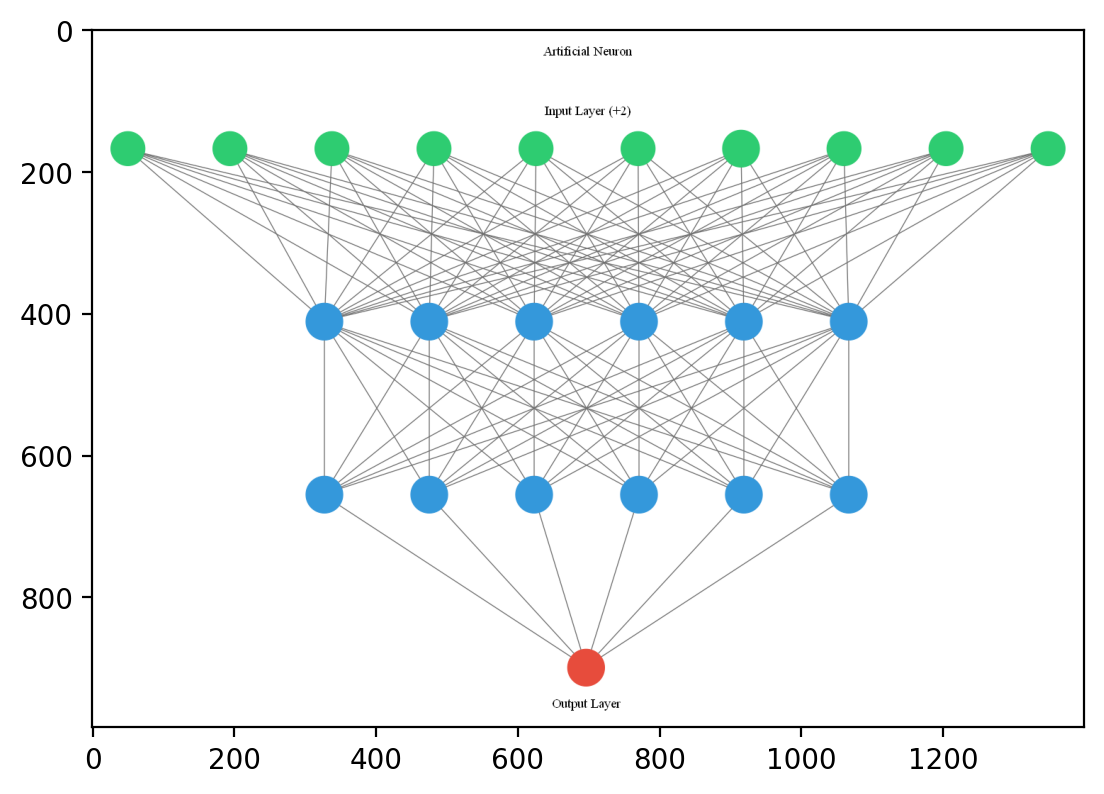

In [36]:
plt.figure(dpi=200)
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

Predict if the customer with the following informations will leave the bank:
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40
- Tenure: 3
- Balance: 60000
- Number of Products: 2
- Has Credit Card: Yes
- Is Active Member: Yes
- Estimated Salary: 50000

In [37]:
print('''Enter Numerical Values as it is, and String values as follows:

Gender: Male -> 1, Female -> 0
Has Credit Card: Yes -> 1, No  -> 0
Is Active Member: Yes -> 1, No  -> 0
For Geography, if it is France, then Geography_France -> 1 and Geography_Germany, Geography_Spain will be 0''')

Enter Numerical Values as it is, and String values as follows:

Gender: Male -> 1, Female -> 0
Has Credit Card: Yes -> 1, No  -> 0
Is Active Member: Yes -> 1, No  -> 0
For Geography, if it is France, then Geography_France -> 1 and Geography_Germany, Geography_Spain will be 0


In [38]:
datapoint = dict()

for variable in X_cols:
    user_input = input(f"Enter {variable}: ")
    datapoint[variable] = user_input

Enter CreditScore: 600
Enter Gender: 1
Enter Age: 40
Enter Tenure: 3
Enter Balance: 6000
Enter NumOfProducts: 2
Enter HasCrCard: 1
Enter IsActiveMember: 1
Enter EstimatedSalary: 50000
Enter Geography_France: 1
Enter Geography_Germany: 0
Enter Geography_Spain: 0


In [39]:
datapoint = pd.DataFrame([datapoint])
datapoint

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,600,1,40,3,6000,2,1,1,50000,1,0,0


In [40]:
datapoint = datapoint.astype(float).values
datapoint

array([[6.e+02, 1.e+00, 4.e+01, 3.e+00, 6.e+03, 2.e+00, 1.e+00, 1.e+00,
        5.e+04, 1.e+00, 0.e+00, 0.e+00]])

In [41]:
datapoint = scaler.transform(datapoint)
datapoint

array([[-0.52111599,  0.91601335,  0.10961719, -0.68538967, -1.11983631,
         0.8095029 ,  0.64259497,  0.9687384 , -0.87203322,  0.98560362,
        -0.5698444 , -0.57369368]])

In [49]:
def predict_datapoint(datapoint, model):
    outcome = model.predict(datapoint, verbose = 0)
    
    if outcome > 0.5:
        return f'Prob: {np.round(outcome,2)}, Customer will Stay with Bank'
    else:
        return f'Prob: {np.round(outcome,2)}, Customer will Exit Soon'

In [50]:
predict_datapoint(datapoint, ann)

'Prob: [[0.02]], Customer will Exit Soon'

Model Evalulation

In [58]:
y_pred = ann.predict(X_test, verbose=0)
y_pred = np.where(y_pred > 0.5, 1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [53]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)), axis=1)

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

Confusion Matrix

In [63]:
cm

array([[1508,   87],
       [ 192,  213]], dtype=int64)

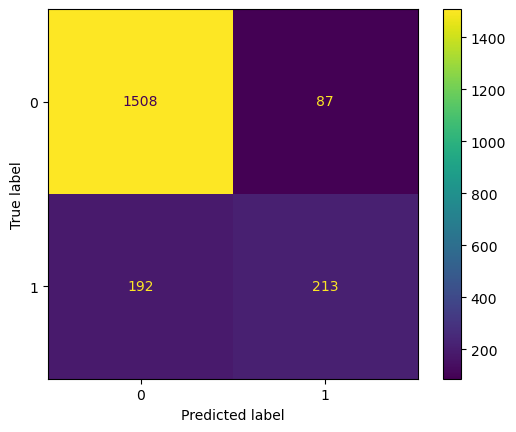

In [61]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [65]:
accuracy_score(y_test, y_pred)

0.8605